# Соревнование ["Car price prediction"](https://www.kaggle.com/c/sf-dst-car-price-prediction)

В данном соревновании нам предоставили набор объявлений о продаже автомобилей с сайта auto.ru и просят предсказать их цену.

Нам дали только тестовый набор данных, и требуется самостоятельно получить тренировочный набор.


# Часть 1. Анализ тестового набора данных

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test.csv')

In [3]:
print(f"В тренировочном наборе {df.shape[0]} строк и {df.shape[1]} колонок")

В тренировочном наборе 34686 строк и 32 колонок


### Посмотрим пример что из себя представляют эти данные

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.2 AMT (105 л.с.),5,1603226273,RUB,2014,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,2017,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 MT (110 л.с.),5,1603226277,RUB,2017,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,88000,2013,"{""code"":""SUPERB"",""name"":""Superb"",""ru_name"":""Су...",SUPERB,DSG 1.8 AMT (152 л.с.),5,1603226280,RUB,2014,1100658222,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,95000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 AT (110 л.с.),5,1603226284,RUB,2014,1100937408,"{""id"":""20105521"",""displacement"":1598,""engine_t...",LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,58536,2008,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.8 AT (152 л.с.),5,1603226288,RUB,2012,1101037972,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

### Есть колонки с пропущенными значениями:
- ПТС
- Владение
- complectation_dict
- equipment_dict

In [6]:
df.isna().sum()

bodyType                    0
brand                       0
car_url                     0
color                       0
complectation_dict      28268
description                 0
engineDisplacement          0
enginePower                 0
equipment_dict           9996
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
Владельцы                   0
Владение                22691
ПТС                         1
Привод                      0
Руль                        0
Состояние                   0
Таможня                     0
dtype: int64

### Количество уникальных записей в колонках

In [7]:
df.nunique(axis=0)

bodyType                   24
brand                      12
car_url                 34686
color                      16
complectation_dict       2364
description             31732
engineDisplacement         55
enginePower               315
equipment_dict          23705
fuelType                    5
image                   34557
mileage                 11268
modelDate                  66
model_info                954
model_name                544
name                     2780
numberOfDoors               5
parsing_unixtime        34686
priceCurrency               1
productionDate             69
sell_id                 34686
super_gen                5890
vehicleConfiguration      634
vehicleTransmission         4
vendor                      2
Владельцы                   3
Владение                  275
ПТС                         2
Привод                      3
Руль                        2
Состояние                   1
Таможня                     1
dtype: int64

## Cмотрим что в колонках

### bodyType

In [8]:
df.bodyType.value_counts()

седан                      13147
внедорожник 5 дв.          12228
лифтбек                     2232
хэтчбек 5 дв.               2124
универсал 5 дв.             1276
минивэн                      995
купе                         824
компактвэн                   489
хэтчбек 3 дв.                485
пикап двойная кабина         280
купе-хардтоп                 158
внедорожник 3 дв.            115
родстер                       99
фургон                        97
кабриолет                     90
седан-хардтоп                 12
микровэн                       7
лимузин                        6
седан 2 дв.                    6
пикап одинарная кабина         5
пикап полуторная кабина        5
внедорожник открытый           3
тарга                          2
фастбек                        1
Name: bodyType, dtype: int64

### brand

In [9]:
df.brand.value_counts().to_dict()

{'BMW': 4473,
 'VOLKSWAGEN': 4404,
 'NISSAN': 4393,
 'MERCEDES': 4180,
 'TOYOTA': 3913,
 'AUDI': 3421,
 'MITSUBISHI': 2843,
 'SKODA': 2741,
 'VOLVO': 1463,
 'HONDA': 1150,
 'INFINITI': 871,
 'LEXUS': 834}

In [10]:
df.brand.nunique()

12

### car_url                     

In [11]:
df.car_url.head()

0    https://auto.ru/cars/used/sale/skoda/octavia/1...
1    https://auto.ru/cars/used/sale/skoda/octavia/1...
2    https://auto.ru/cars/used/sale/skoda/superb/11...
3    https://auto.ru/cars/used/sale/skoda/octavia/1...
4    https://auto.ru/cars/used/sale/skoda/octavia/1...
Name: car_url, dtype: object

ссылка на объявление  
из ссылки можно модель получить, если нету отдельноу

In [12]:
df.car_url.str.slice(31,44).value_counts()

skoda/octavia    1455
volkswagen/pa     934
toyota/land_c     901
mitsubishi/la     875
mercedes/e_kl     845
                 ... 
audi/a3/10984       1
bmw/x6/109541       1
audi/a7/10999       1
bmw/x5/109702       1
toyota/porte/       1
Name: car_url, Length: 3008, dtype: int64

In [13]:
df.car_url.loc[0]

'https://auto.ru/cars/used/sale/skoda/octavia/1100575026-c780dc09/'

### color

In [14]:
df.color.value_counts()

чёрный         11010
белый           6133
серебристый     4113
серый           3984
синий           3289
красный         1531
коричневый      1501
зелёный          952
бежевый          639
голубой          457
золотистый       266
пурпурный        254
фиолетовый       219
жёлтый           194
оранжевый        131
розовый           13
Name: color, dtype: int64

просто описание объявления

### engineDisplacement

In [15]:
df.engineDisplacement.value_counts()

2.0 LTR    7391
1.6 LTR    4973
3.0 LTR    3915
1.8 LTR    3349
2.5 LTR    2477
2.4 LTR    1745
3.5 LTR    1710
1.4 LTR    1635
1.5 LTR     725
1.2 LTR     485
4.4 LTR     447
2.8 LTR     384
4.7 LTR     377
1.3 LTR     365
5.5 LTR     361
4.0 LTR     356
3.2 LTR     348
4.5 LTR     346
2.1 LTR     271
3.7 LTR     242
2.2 LTR     236
4.2 LTR     228
1.9 LTR     221
2.3 LTR     203
2.7 LTR     189
3.6 LTR     183
5.6 LTR     170
5.0 LTR     158
5.7 LTR     135
2.9 LTR     131
4.6 LTR     108
3.1 LTR      88
4.8 LTR      84
1.7 LTR      59
3.8 LTR      57
1.0 LTR      57
 LTR         55
2.6 LTR      55
0.7 LTR      53
6.0 LTR      53
3.3 LTR      44
3.4 LTR      36
4.1 LTR      35
4.3 LTR      32
5.4 LTR      31
6.2 LTR      28
5.9 LTR      12
5.2 LTR      12
6.3 LTR       8
5.8 LTR       7
6.6 LTR       6
1.1 LTR       4
4.9 LTR       4
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

### enginePower

In [16]:
df.enginePower.value_counts()

249 N12    1708
150 N12    1699
110 N12    1039
170 N12     977
105 N12     955
           ... 
338 N12       1
303 N12       1
42 N12        1
480 N12       1
430 N12       1
Name: enginePower, Length: 315, dtype: int64

### fuelType

In [17]:
df.fuelType.value_counts()

бензин     28601
дизель      5800
гибрид       223
электро       55
газ            7
Name: fuelType, dtype: int64

### image

In [18]:
df.image.head()

0    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
1    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
2    https://avatars.mds.yandex.net/get-autoru-vos/...
3    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
4    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
Name: image, dtype: object

In [19]:
df.image.loc[0]

'https://autoru.naydex.net/o9DBXQ270/5ac010hAY0/Xkcrbmf2u0IghxJHqVi5dGL7OcugpPbM0sYLDhB9YWw7CxRKU17ysuJYxu9oaUHn7ahNSrqiKwm-CQDyDolDeEoEc3J49fgWYNYBUbQC7D96sj6K9_O-mo6XT34oWVQDBTEybGZikaX4X4bwLyUujf_KICqw3ygs2UNJlXu4Og#DSD'

### mileage                 

<AxesSubplot:>

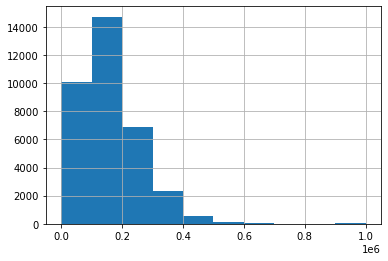

In [20]:
df.mileage.hist()

### modelDate

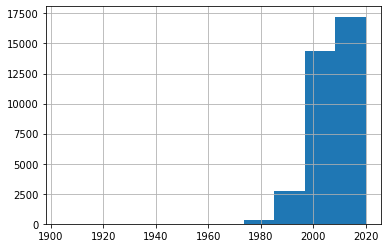

In [21]:
df.modelDate.hist();

### model_name

In [22]:
df.model_name.value_counts()

OCTAVIA     1418
5ER         1026
LANCER       855
E_KLASSE     809
PASSAT       782
            ... 
E_TRON         1
CAVALIER       1
MR_S           1
TORNEO         1
AYGO           1
Name: model_name, Length: 544, dtype: int64

### name

In [23]:
df.name

0                        1.2 AMT (105 л.с.)
1                         1.6 MT (110 л.с.)
2                    DSG 1.8 AMT (152 л.с.)
3                         1.6 AT (110 л.с.)
4                         1.8 AT (152 л.с.)
                        ...                
34681                316i 1.6 AT (136 л.с.)
34682    520d xDrive 2.0d AT (190 л.с.) 4WD
34683                523i 2.5 AT (170 л.с.)
34684            20d 2.0d AT (184 л.с.) 4WD
34685            30d 3.0d AT (235 л.с.) 4WD
Name: name, Length: 34686, dtype: object

Это видимо название объявления, оно как-то алгоритмически предопределено, поэтому может стоит из него что-то вытащить, если чего то у нас нету.

### numberOfDoors

In [24]:
df.numberOfDoors.value_counts()

5    18703
4    14126
2     1206
3      650
0        1
Name: numberOfDoors, dtype: int64

### parcing_unix_date

<AxesSubplot:>

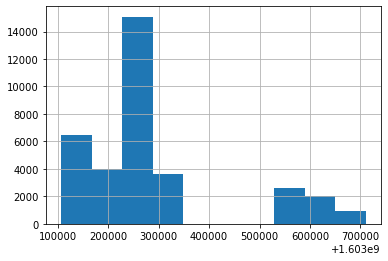

In [25]:
df.parsing_unixtime.hist()

### priceCurrency

In [26]:
df.priceCurrency.value_counts()

RUB    34686
Name: priceCurrency, dtype: int64

### productionDate

<AxesSubplot:>

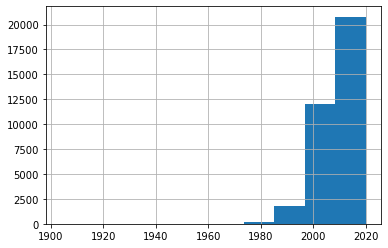

In [27]:
df.productionDate.hist()

### sell_id

In [28]:
df.sell_id.value_counts()

1101243311    1
1101207839    1
1101219298    1
1101297124    1
1101364709    1
             ..
1099483756    1
1101316717    1
1101210225    1
1101347442    1
1092026368    1
Name: sell_id, Length: 34686, dtype: int64

### vehicleConfiguration

In [29]:
df.vehicleConfiguration

0                   LIFTBACK ROBOT 1.2
1              LIFTBACK MECHANICAL 1.6
2                   LIFTBACK ROBOT 1.8
3               LIFTBACK AUTOMATIC 1.6
4               LIFTBACK AUTOMATIC 1.8
                     ...              
34681              SEDAN AUTOMATIC 1.6
34682              SEDAN AUTOMATIC 2.0
34683              SEDAN AUTOMATIC 2.5
34684    ALLROAD_5_DOORS AUTOMATIC 2.0
34685    ALLROAD_5_DOORS AUTOMATIC 3.0
Name: vehicleConfiguration, Length: 34686, dtype: object

### vehicleTransmission

In [30]:
df.vehicleTransmission.value_counts()

автоматическая      19596
механическая         7209
вариатор             3999
роботизированная     3882
Name: vehicleTransmission, dtype: int64

Много уникальных значений (75)

### vendor

In [31]:
df.vendor.value_counts()

EUROPEAN    20682
JAPANESE    14004
Name: vendor, dtype: int64

### Другое

In [32]:
df['Привод'].value_counts()

передний    15565
полный      15020
задний       4101
Name: Привод, dtype: int64

In [33]:
df['Руль'].value_counts()

Левый     33287
Правый     1399
Name: Руль, dtype: int64

In [34]:
df['Состояние'].value_counts()

Не требует ремонта    34686
Name: Состояние, dtype: int64

In [35]:
df['Владельцы'].value_counts()

3 или более    15957
1 владелец      9459
2 владельца     9270
Name: Владельцы, dtype: int64

In [36]:
df['ПТС'].value_counts()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [37]:
df['Таможня'].value_counts()

Растаможен    34686
Name: Таможня, dtype: int64

In [38]:
df['Владение'].value_counts()

1 год и 10 месяцев    209
2 года                197
1 год                 194
1 год и 1 месяц       193
1 год и 2 месяца      187
                     ... 
18 лет и 5 месяцев      1
26 лет и 7 месяцев      1
20 лет и 5 месяцев      1
16 лет и 5 месяцев      1
21 год и 6 месяцев      1
Name: Владение, Length: 275, dtype: int64

## Поля с помощью которых можно добавлять новые признаки, но сами по себе они бесмыслены

### complectation_dict

In [39]:
df.complectation_dict

0                                                      NaN
1                                                      NaN
2        {"id":"20026336","name":"Ambition","available_...
3        {"id":"20803582","name":"Ambition","available_...
4                                                      NaN
                               ...                        
34681                                                  NaN
34682                                                  NaN
34683                                                  NaN
34684    {"id":"6336008","name":"xDrive20d Локальная сб...
34685                                                  NaN
Name: complectation_dict, Length: 34686, dtype: object

### description

In [40]:
df.description

0        Все автомобили, представленные в продаже, прох...
1        ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...
2        Все автомобили, представленные в продаже, прох...
3        КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...
4        ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...
                               ...                        
34681    Продается BMW 316i в отличном состоянии. Прода...
34682                       Продаётся отличный автомобиль.
34683                                    Хорошее состояние
34684    Автомобиль в идеальном состоянии . Куплен новы...
34685     Пробег реальный, состояние отличное! Авторска...
Name: description, Length: 34686, dtype: object

### equipment_dict

In [41]:
df.equipment_dict

0        {"engine-proof":true,"tinted-glass":true,"airb...
1        {"cruise-control":true,"asr":true,"esp":true,"...
2        {"cruise-control":true,"tinted-glass":true,"es...
3        {"cruise-control":true,"roller-blind-for-rear-...
4        {"cruise-control":true,"asr":true,"esp":true,"...
                               ...                        
34681    {"cruise-control":true,"asr":true,"tinted-glas...
34682                                                  NaN
34683                                                  NaN
34684    {"engine-proof":true,"esp":true,"start-stop-fu...
34685    {"alloy-wheel-disks":true,"navigation":true,"p...
Name: equipment_dict, Length: 34686, dtype: object

### model_info

In [42]:
df.model_info

0        {"code":"OCTAVIA","name":"Octavia","ru_name":"...
1        {"code":"OCTAVIA","name":"Octavia","ru_name":"...
2        {"code":"SUPERB","name":"Superb","ru_name":"Су...
3        {"code":"OCTAVIA","name":"Octavia","ru_name":"...
4        {"code":"OCTAVIA","name":"Octavia","ru_name":"...
                               ...                        
34681    {"code":"3ER","name":"3 серии","ru_name":"3 се...
34682    {"code":"5ER","name":"5 серии","ru_name":"5 се...
34683    {"code":"5ER","name":"5 серии","ru_name":"5 се...
34684    {"code":"X1","name":"X1","ru_name":"Х1","morph...
34685    {"code":"X5","name":"X5","ru_name":"Х5","morph...
Name: model_info, Length: 34686, dtype: object

### super_gen

In [43]:
df.super_gen

0        {"id":"10373605","displacement":1197,"engine_t...
1        {"id":"20913311","displacement":1598,"engine_t...
2        {"id":"20026323","nameplate":"DSG","displaceme...
3        {"id":"20105521","displacement":1598,"engine_t...
4        {"id":"4561004","displacement":1798,"engine_ty...
                               ...                        
34681    {"id":"8546464","name":"316","nameplate":"316i...
34682    {"id":"20856402","name":"520","nameplate":"520...
34683    {"id":"6329747","name":"523","nameplate":"523i...
34684    {"id":"8247004","name":"20d","nameplate":"20d"...
34685    {"id":"20390090","name":"30d","nameplate":"30d...
Name: super_gen, Length: 34686, dtype: object

### complectation_dict

In [44]:
df.complectation_dict

0                                                      NaN
1                                                      NaN
2        {"id":"20026336","name":"Ambition","available_...
3        {"id":"20803582","name":"Ambition","available_...
4                                                      NaN
                               ...                        
34681                                                  NaN
34682                                                  NaN
34683                                                  NaN
34684    {"id":"6336008","name":"xDrive20d Локальная сб...
34685                                                  NaN
Name: complectation_dict, Length: 34686, dtype: object

# Выводы

* В тестовом наборе 34686 записей
* 12 марок автомобилей BMW VOLKSWAGEN NISSAN MERCEDES TOYOTA AUDI MITSUBISHI SKODA VOLVO HONDA INFINITI LEXUS
* Есть колонки с json полями, которые можно использовать для генерации новых фич

# Дальнейшие шаги

* Написать скрипт, собирающий данные из объявлений на сайте auto.ru